In [3]:
# Import Keras modules and its important APIs
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
# from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os
import torch
import torch.nn as nn
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50,ResNet152V2
from tensorflow.keras.applications.resnet50 import preprocess_input


In [ ]:
train_path="archive - Copy/Indian-monuments/images/train"

In [ ]:
# splitfolders.ratio(train_path, output="archive - Copy/data-split", seed=1337, ratio=(0.7, 0.2, 0.1), group_prefix=None, move=False)


In [ ]:
dicti_values={0:'Ajanta Caves',
 1:'Charar E Sharif',
 2:'Chhota Imambara',
 3:'Ellora Caves',
 4:'Fatehpur Sikri',
 5:'Gateway of India',
 6:'Humayun_s Tomb',
 7:'India gate pics',
 8:'Khajuraho',
 9:'Sun Temple Konark',
 10:'alai darwaza',
 11:'alai minar',
 12:'basilica of bom jesus',
 13:'charminar',
 14:'golden temple',
 15:'hawa mahal pics',
 16:'iron pillar',
 17:'jamali kamali_tomb',
 18:'lotus temple',
 19:'mysore palace',
 20:'qutub minar',
 21:'tajmahal',
 22:'tanjavur temple',
 23:'victoria memorial'}
l=[]
for i in range(23):
    l.append(dicti_values[i])
class_names=l
print(class_names)

['Ajanta Caves', 'Charar E Sharif', 'Chhota Imambara', 'Ellora Caves', 'Fatehpur Sikri', 'Gateway of India', 'Humayun_s Tomb', 'India gate pics', 'Khajuraho', 'Sun Temple Konark', 'alai darwaza', 'alai minar', 'basilica of bom jesus', 'charminar', 'golden temple', 'hawa mahal pics', 'iron pillar', 'jamali kamali_tomb', 'lotus temple', 'mysore palace', 'qutub minar', 'tajmahal', 'tanjavur temple']


In [ ]:
datagen = ImageDataGenerator()

In [ ]:
train_generator = datagen.flow_from_directory( 
    directory="archive - Copy/data-split/train", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="binary", 
)
valid_generator = datagen.flow_from_directory( 
    directory="archive - Copy/data-split/val", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

# test data
test_generator = datagen.flow_from_directory( 
    directory="archive - Copy\data-split/test", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
C:\Users\91995\AppData\Local\Temp\ipykernel_21080\1830802308.py:18: SyntaxWarning: invalid escape sequence '\d'
  directory="archive - Copy\data-split/test",


Found 2935 images belonging to 23 classes.
Found 836 images belonging to 23 classes.
Found 433 images belonging to 23 classes.


In [ ]:
resnet_152 = ResNet152V2(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_152.layers:
    layer.trainable = False

In [ ]:
x = resnet_152.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(24, activation='softmax')(x)
model = Model(inputs = resnet_152.input, outputs = predictions)

In [ ]:
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [ ]:
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

Epoch 1/10


c:\Users\91995\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 1012s 11s/step - accuracy: 0.0623 - loss: 274.2714 - val_accuracy: 0.0801 - val_loss: 3.1068
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 897s 10s/step - accuracy: 0.0932 - loss: 3.1513 - val_accuracy: 0.0801 - val_loss: 2.9941
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 987s 11s/step - accuracy: 0.0826 - loss: 2.9702 - val_accuracy: 0.0921 - val_loss: 2.8850
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 923s 10s/step - accuracy: 0.0823 - loss: 2.8846 - val_accuracy: 0.0921 - val_loss: 2.8145
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1033s 11s/step - accuracy: 0.1051 - loss: 2.8234 - val_accuracy: 0.0921 - val_loss: 2.7683
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1039s 11s/step - accuracy: 0.0852 - loss: 2.7875 - val_accuracy: 0.0921 - val_loss: 2.7310
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1023s 11s/step - accuracy: 0.0739 - loss: 2.7698 - val_accuracy: 0.0921 - val_loss: 2.7027
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1019s 11s/step - accuracy: 0.0902 - loss: 2.7399 - val_accuracy: 0.0921

In [ ]:
model.save('resnet_model152-1.h5')

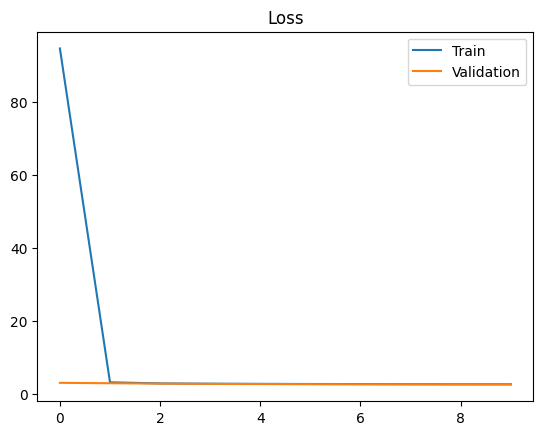

In [ ]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

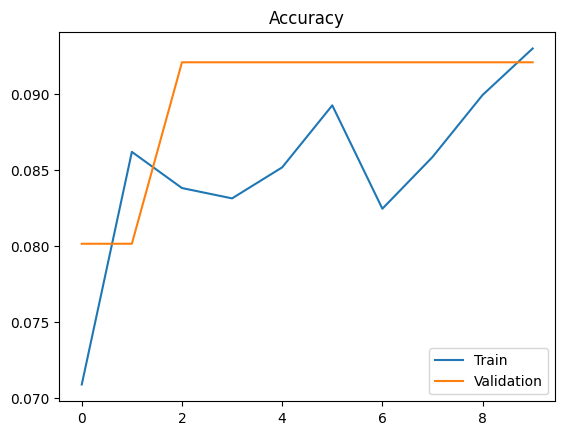

In [ ]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

14/14 ━━━━━━━━━━━━━━━━━━━━ 216s 15s/step - accuracy: 0.0970 - loss: 2.6467
The test loss is:  2.6513588428497314
The best accuracy is:  9.237875044345856


In [ ]:
model.save('resnet_model152-2.h5')

In [26]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 59,554,778 (227.18 MB)

 Trainable params: 59,411,032 (226.64 MB)

 Non-trainable params: 143,744 (561.50 KB)

 Optimizer params: 2 (12.00 B)